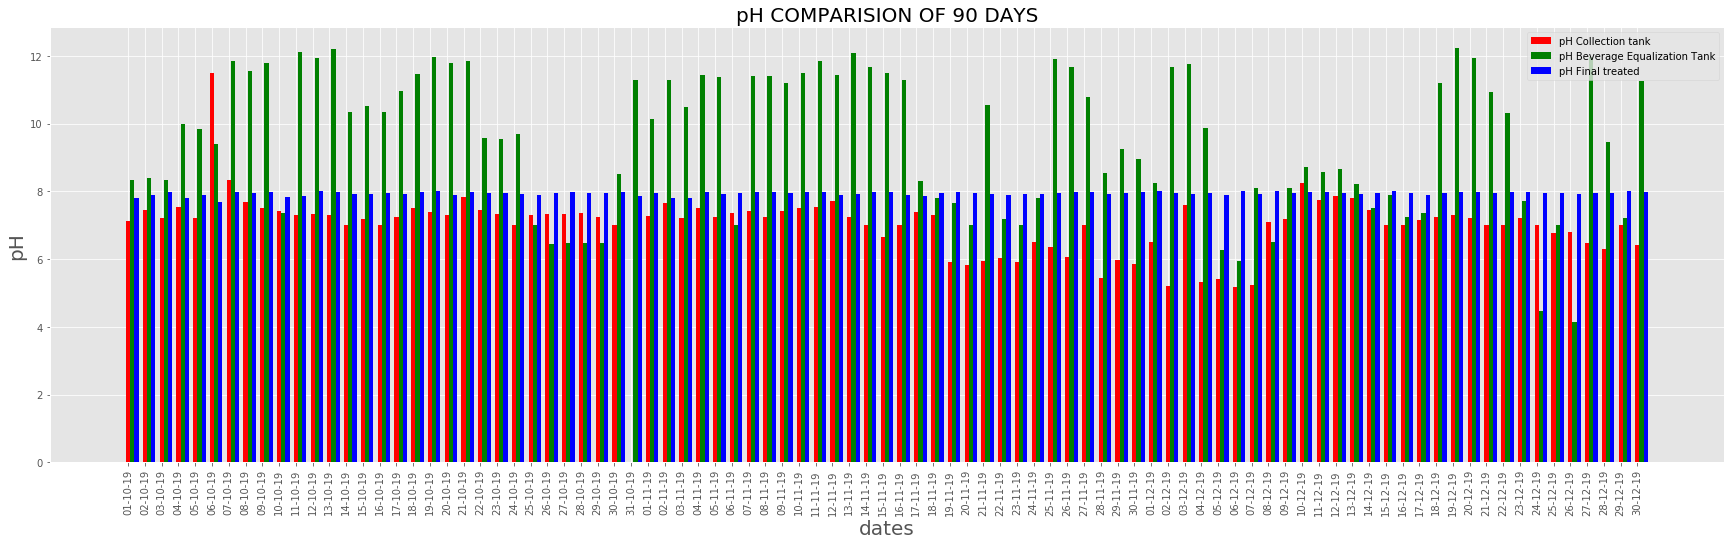

In [160]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.utils.validation import column_or_1d

plt.rcParams["figure.figsize"]=30,8 #figure size
plt.style.use('ggplot') # plot type

# importing datasets

url = "https://raw.githubusercontent.com/testingship19/mltesting/master/Oct.csv"
url2 = "https://raw.githubusercontent.com/testingship19/mltesting/master/Nov.csv"
url3 ="https://raw.githubusercontent.com/testingship19/mltesting/master/Dec.csv"

# assigning corresponding labels

names = ['Date',
         'Day',
         'pH_CT',
         'TDS_CT',
         'TSS_CT',
         'O_G_CT',
         'COD_CT',
         'BOD_CT',
         'pH_BET',
         'TDS_BET',
         'TSS_BET',
         'O_G_BET',
         'COD_BET',
         'IQ_BET',
         'pH_F',
         'TDS_F',
         'TSS_F',
         'O_G_F',
         'COD_F',
         'BOD_F',
         'Oqw',
         'Oqt',
         'Sludge']

# reading files using pandas

df = pd.read_csv(url,names=names)
df2 = pd.read_csv(url2,names=names)
df3 = pd.read_csv(url3,names=names)

# combining datasets into single dataset
frames = [df,df2,df3]
ndf = pd.concat(frames, ignore_index=True)

# Data Cleaning
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
ndf = ndf.replace(np.nan, 0)
ndf = ndf.replace(to_replace =["BDL"],value = 0)

# plotting 90 days data

# Bar plot
x = np.arange(91)
plt.bar(x+0.00,ndf.pH_CT,color='r',width=0.25,align='center', label = 'pH Collection tank')
plt.bar(x+0.25,ndf.pH_BET,color='g',width=0.25, label = 'pH Beverage Equalization Tank')
plt.bar(x+0.50,ndf.pH_F,color='b',width=0.25,label = 'pH Final treated')


# Name plotting

plt.xticks(x, ndf.Date, rotation=90)
plt.xlabel('dates', fontsize=20)
plt.ylabel('pH',fontsize=20)
plt.title("pH COMPARISION OF 90 DAYS", fontsize=20)
plt.legend()

#saving plot
plt.savefig('ppt.png')





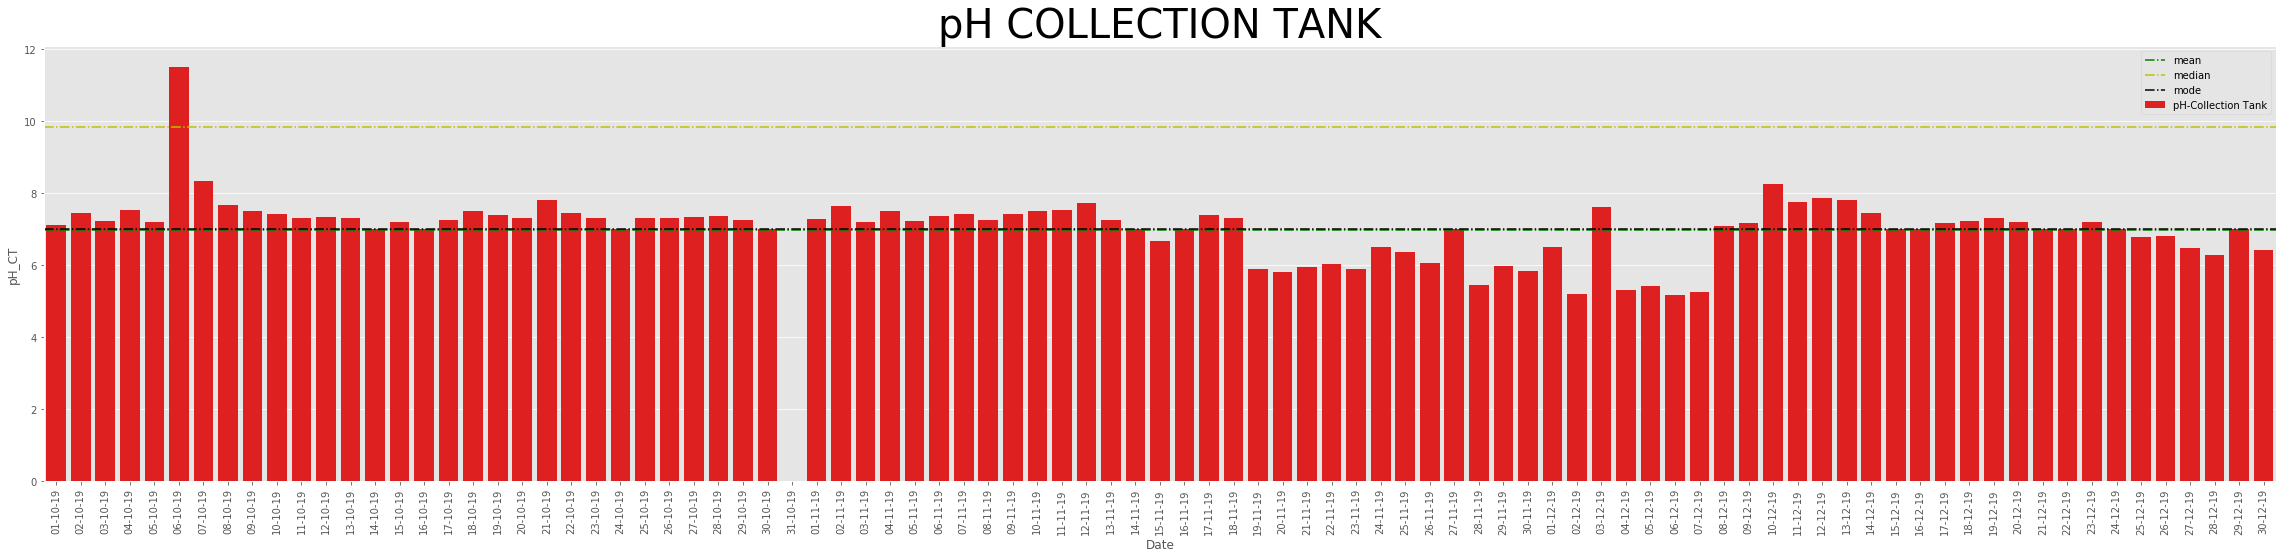

In [144]:
sns.barplot(x=ndf.Date, y=ndf.pH_CT, color = 'r', label = 'pH-Collection Tank')
mean = ndf.pH_CT.mean()
plt.axhline(mean, color='g', linestyle='-.',label ='mean')
median = ndf.pH_BET.median()
plt.axhline(median, color='y', linestyle='-.',label='median')
plt.axhline(7.0, color='k', linestyle='-.',label='mode')
plt.legend()
plt.title('pH COLLECTION TANK', fontsize = 40)
plt.xticks(x, ndf.Date, rotation=90)

plt.savefig('ph1.png')

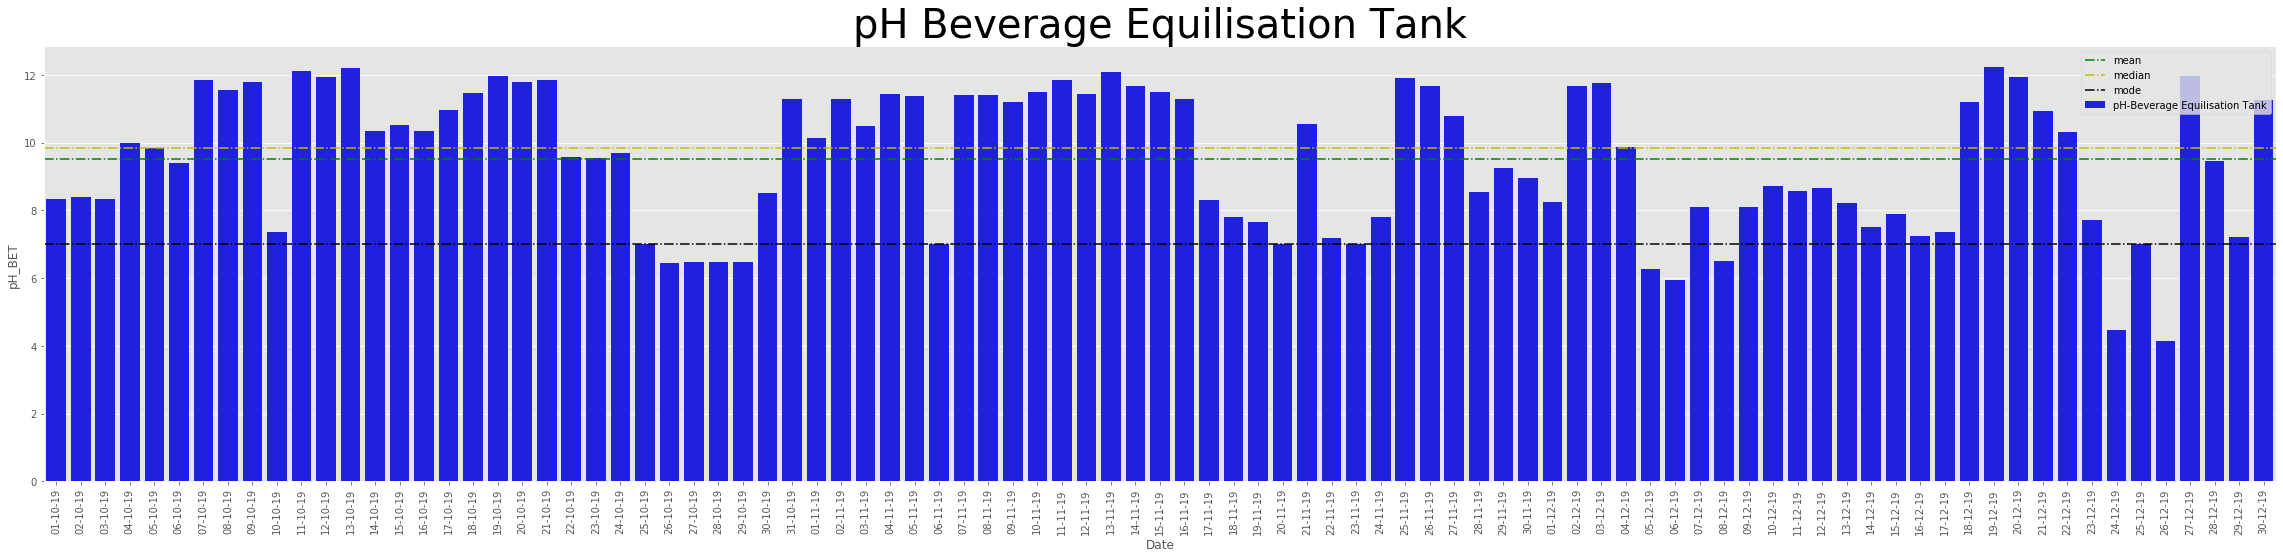

In [147]:
sns.barplot(x=ndf.Date, y=ndf.pH_BET, color = 'b', label = 'pH-Beverage Equilisation Tank')
mean2 = ndf.pH_BET.mean()
plt.axhline(mean2, color='g', linestyle='-.',label ='mean')
median2 = ndf.pH_BET.median()
plt.axhline(median2, color='y', linestyle='-.',label='median')
plt.axhline(7.0, color='k', linestyle='-.',label='mode')
plt.legend()
plt.title('pH Beverage Equilisation Tank', fontsize = 40)
plt.xticks(x, ndf.Date, rotation=90)

plt.savefig('ph2.png')

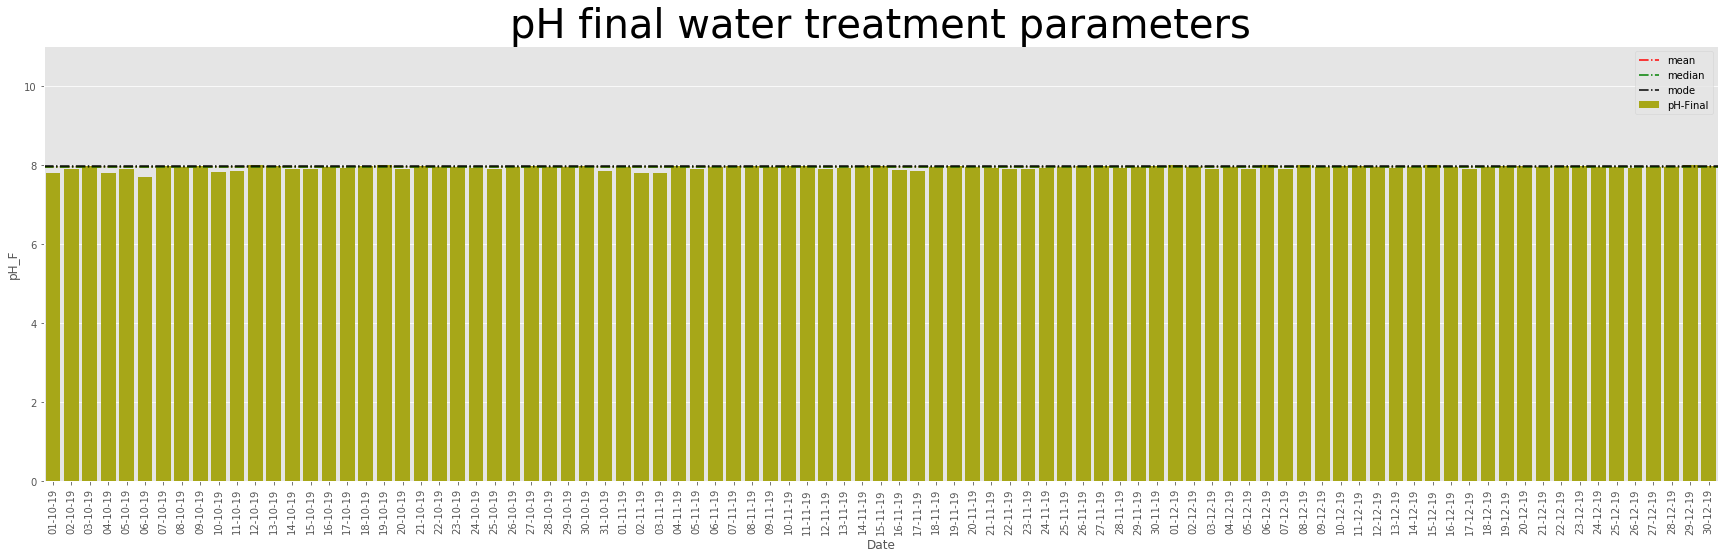

In [176]:
plt.ylim(0,11)
sns.barplot(x=ndf.Date, y=ndf.pH_F, color = 'y', label = 'pH-Final')
mean3 = ndf.pH_F.mean()
plt.axhline(mean3, color='r', linestyle='-.',label ='mean')
median3 = ndf.pH_F.median()
plt.axhline(median3, color='g', linestyle='-.',label='median')
plt.axhline(7.98, color='k', linestyle='-.',label='mode')
plt.legend()
plt.title('pH final water treatment parameters', fontsize = 40)
plt.xticks(x, ndf.Date, rotation=90)

plt.savefig('ph3.png')

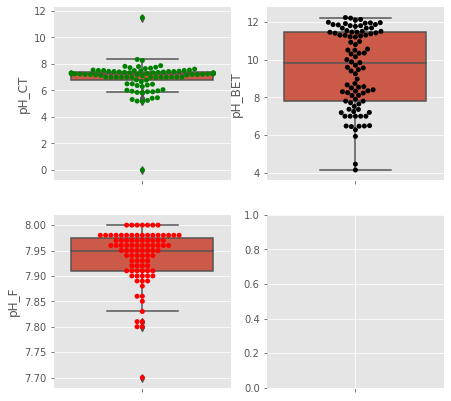

In [113]:
# Outliers


f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

sns.boxplot(y=ndf.pH_CT, data=ndf,ax=axes[0, 0])
sns.swarmplot(y=ndf.pH_CT, data=ndf, color='g', ax=axes[0, 0])


sns.boxplot(y=ndf.pH_BET, data=ndf,ax=axes[0, 1])
sns.swarmplot(y=ndf.pH_BET, data=ndf, color='k', ax=axes[0, 1])

sns.boxplot(y=ndf.pH_F, data=ndf,ax=axes[1, 0])
sns.swarmplot(y=ndf.pH_F, data=ndf, color='r', ax=axes[1, 0])

plt.savefig('ppt2.png')


In [174]:
# model creation

#splitting dataset into training and testing
X = np.array(ndf.pH_CT)
y = np.array(ndf.pH_F)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) #shuffling the dataset (not changing the corresponding values)

# Reshaping arrays
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

#using Support Vector machine classifier 
clf = svm.SVR(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

#predicting on y_test
y_predict = clf.predict(X_test)

accuracy

C:\Users\Lab 323 C3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8822502164837799

In [172]:
print(y_test)

[7.97 7.91 7.91 7.98 7.92 7.86 7.97 7.93 7.95 7.98 7.96 7.98 7.8  8.
 7.97 7.93 7.9  7.98 8.  ]


In [173]:
print(y_predict)

[7.90023717 7.900313   7.88879057 7.89912447 7.90038794 7.86114732
 7.90030458 7.90021271 7.89077934 7.89905756 7.89763127 7.90007444
 7.90024949 7.90028463 7.89934444 7.90021271 7.90013381 7.90015033
 7.86860964]


In [175]:
print(X_test)

[[7.22]
 [7.  ]
 [5.9 ]
 [7.54]
 [6.8 ]
 [0.  ]
 [6.66]
 [7.25]
 [5.97]
 [6.41]
 [7.68]
 [7.34]
 [7.2 ]
 [7.1 ]
 [7.51]
 [7.25]
 [7.31]
 [7.3 ]
 [5.17]]
